### Basis of PINN: calculate derivatives in pytorch
The essence of Physics Informed Neural Networks is including physical differential equations in the loss function. In other words, PINN takes equations in the loss as physical constraint to the training of neural network, which increases the physical awareness of the neural network.

Pytorch supports calculation of derivatives, which makes the construction of PINN much easier. In this notebook, we will use a few examples to show how to calculate derivatives and include them in the computational graph of pytorch.

This notebook is inspired by the following blog: <br>
https://machinelearningmastery.com/calculating-derivatives-in-pytorch/

In [1]:
import matplotlib.pyplot as plt
import torch

First a very simple example about the Auto Differentiation feature of pytorch.

In [2]:
x = torch.tensor(2.0, requires_grad = True)
print("Initialize a tensor x", x)
y = 5 * x ** 2
y.backward()
print("Calculate derivatives of y (equation) at x=2.0", x.grad)

Initialize a tensor x tensor(2., requires_grad=True)
Calculate derivatives of y (equation) at x=2.0 tensor(20.)


#### Computational graph
Pytorch performs backpropagation via the computational graph, in which tensors and backward functions are treated as nodes on the graph.

It computes the derivative of a tensor depending on whether it is a leaf node or not.

Now let's take a look at the related properties of a tensor class:

In [3]:
print('data attribute of the tensor:',x.data)
print('grad attribute of the tensor::',x.grad)
print('grad_fn attribute of the tensor::',x.grad_fn)
print("is_leaf attribute of the tensor::",x.is_leaf)
print("requires_grad attribute of the tensor::",x.requires_grad)

data attribute of the tensor: tensor(2.)
grad attribute of the tensor:: tensor(20.)
grad_fn attribute of the tensor:: None
is_leaf attribute of the tensor:: True
requires_grad attribute of the tensor:: True


We can increase the complexity of the function.

In [4]:
x = torch.tensor(4.0, requires_grad = True)
print("Initialize a tensor x", x)
y = 3 * x ** 2 + 7 * x + 3
y.backward()
print("Calculate derivatives of y (equation) at x=4.0", x.grad)

Initialize a tensor x tensor(4., requires_grad=True)
Calculate derivatives of y (equation) at x=4.0 tensor(31.)


Pytorch can take care of partial differentials as well.

In [5]:
x1 = torch.tensor(3.0, requires_grad = True)
x2 = torch.tensor(2.0, requires_grad = True)

y = 3 * x1 + 4 * x2

print("Initialize a tensor x1", x1)
print("Initialize a tensor x2", x2)

y.backward()

print("Partial derivative w.r.t to x1", x1.grad)
print("Partial derivative w.r.t to x1", x2.grad)

Initialize a tensor x1 tensor(3., requires_grad=True)
Initialize a tensor x2 tensor(2., requires_grad=True)
Partial derivative w.r.t to x1 tensor(3.)
Partial derivative w.r.t to x1 tensor(4.)


For a tensor with multiple values, Pytorch can also handle it, but...

In [7]:
x = torch.linspace(-20, 20, 20, requires_grad = True)
y = x ** 2
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

This error indicates that we can only run `.backward` (with no arguments) on a unitary/scalar tensor (i.e. a tensor with a single element.). Therefore, we need to make it a scalar tensor, e.g. adding a sum.

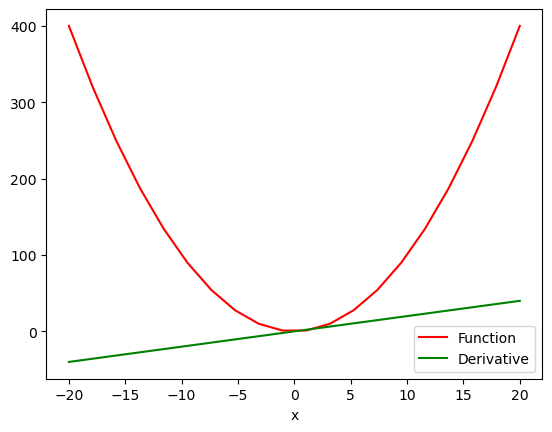

In [8]:
# compute the derivative of the function with multiple values
x = torch.linspace(-20, 20, 20, requires_grad = True)
Y = x ** 2
y = torch.sum(Y)
y.backward()
 
# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()